In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import os
import json

In [2]:
scores = []
with open("results/test_BASE.json", "r") as f:
    scores.append(json.load(f))
    
with open("results/ES_stemming_qm.json", "r") as f:
    scores.append(json.load(f))
    

Load depth evaluations for Electra Large model reranking

In [3]:
with open("results/electra_qm_depth_scores.txt", "r") as f:
    electra_ds = {}
    for line in f:
        _, qid, score = line.split("\t")
        if len(qid.split('_')) != 2:
            continue
        depth = qid.split('_')[1]
        if depth not in electra_ds:
            electra_ds[depth] = []
        score = float(score.strip())
        electra_ds[depth].append(score)
scores.append(electra_ds)

In [4]:
with open("results/electra_base_depth_scores.txt", "r") as f:
    electra_ds = {}
    for line in f:
        _, qid, score = line.split("\t")
        if len(qid.split('_')) != 2:
            continue
        depth = qid.split('_')[1]
        if depth not in electra_ds:
            electra_ds[depth] = []
        score = float(score.strip())
        electra_ds[depth].append(score)
scores.append(electra_ds)

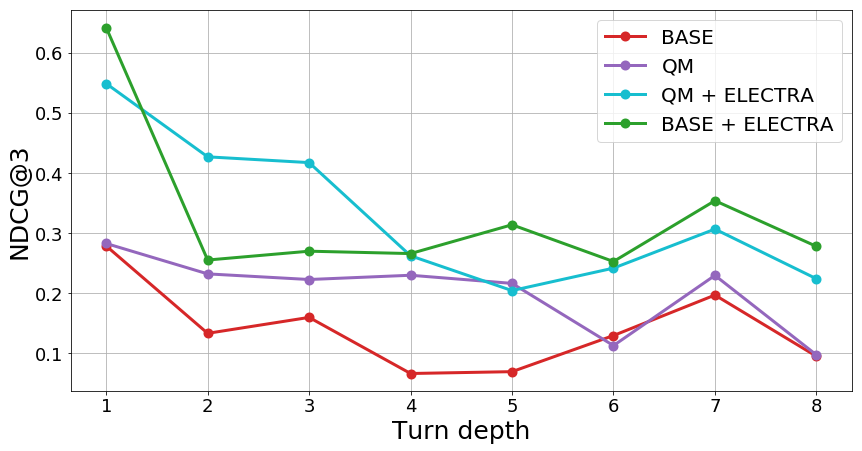

In [5]:
fig = plt.figure(figsize=(14, 7)) 
ax = fig.add_subplot(111)

colors = ['C3', 'C4', 'C9', 'C2']
desc = ['BASE', 'QM', 'QM + ELECTRA', 'BASE + ELECTRA']

for i, tds in enumerate(scores):
    x = [depth for depth in range(1,9)]
    y = [np.mean(tds[str(j)]) for j in range(1,9)]
    ax.plot(x,y,'.-',c=colors[i], linewidth=3, mew=5, ms=10, label=desc[i])

plt.xlabel('Turn depth', fontsize=25)
plt.ylabel('NDCG@3',fontsize=25)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.grid(True)
plt.legend(loc="upper right", prop={'size': 20})
plt.savefig('figures/turn_depth_scores.png')
plt.show()

## Visualize query lengths for varying turn depths

In [6]:
with open("runs/qfile_ES_stemming_qm.tsv", "r") as f:
    dl = {}
    for line in f:
        qid, q = line.split("\t")
        if len(qid.split('_')) != 2:
            continue
        l = len(q.split())
        depth = qid.split('_')[1]
        if depth not in dl:
            dl[depth] = []
        dl[depth].append(l)

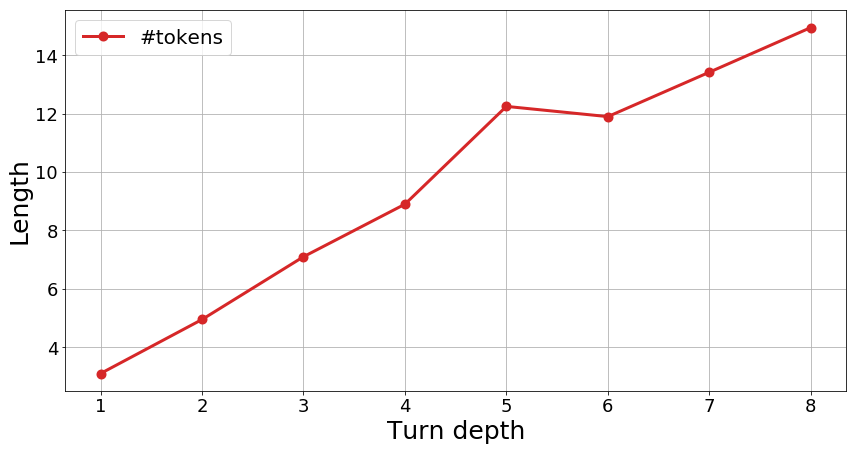

In [7]:
fig = plt.figure(figsize=(14, 7)) 
ax = fig.add_subplot(111)

x = [depth for depth in range(1,9)]
y = [np.mean(dl[str(j)]) for j in range(1,9)]

ax.plot(x,y,'.-',c='C3', linewidth=3, mew=5, ms=10, label='#tokens')

plt.xlabel('Turn depth', fontsize=25)
plt.ylabel('Length',fontsize=25)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.grid(True)
plt.legend(loc="upper left", prop={'size': 20})
plt.savefig('figures/turn_depth_query_length.png')
plt.show()